In [68]:
# !pip install noisereduce
# !pip install symbl
# !pip install telnyx
# !pip install wavio  
# !pip install phonenumbers
# !pip install opencage
# !pip install folium
import folium
from opencage.geocoder import OpenCageGeocode
import phonenumbers
from phonenumbers import geocoder,carrier
import symbl
import telnyx
import IPython 
import wavio
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import requests
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

2021-09-26 13:49:44,871 - matplotlib.pyplot - 5552 - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
telnyx.api_key = "KEY017C1F6CA57EE8656C2BC9CA861B5A5A_dM8MW3G3DGkXsKS4oQRPSd"
app_id = "366b5163747834797945504b306e5037494a567841507856383570564f6a6a4d" 
app_secret = "53796c314e76737756526f764371586d5f69564b444a756f4976792d6f4f414c4678514e33767334494c5544446f315362694372766a476737546e6255547745"
key="a69c4da3267940b09b2c036d14d90ede"
local_path = './test.wav'

In [72]:
url2 = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response2 = urllib.request.urlopen(url2)
data2, rate2 = sf.read(io.BytesIO(response2.read()))

In [73]:
IPython.display.Audio(data=data2, rate=rate2)

# Modules

Reading Audio

In [6]:
def read_audio():
    url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
    response = urllib.request.urlopen(url)
    data, rate = sf.read(io.BytesIO(response.read()))
    return IPython.display.Audio(data=data, rate=rate),data,rate

In [7]:
read_audio()[0]

Adding Noise

In [18]:
def add_noise(data,rate):
    noise_len = 2 # seconds
    noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*80
    noise_clip = noise[:rate*noise_len]
    audio_clip_band_limited = data+noise
    return IPython.display.Audio(data=audio_clip_band_limited, rate=rate),audio_clip_band_limited,noise_clip

In [23]:
def reduce_background_noise(audio,noise_clip):
    reduced_noise = nr.reduce_noise(y = audio, sr=rate, y_noise = noise_clip, n_std_thresh_stationary=1.5,stationary=True)
    wavio.write(local_path, reduced_noise, rate, sampwidth=2 )
    fig, ax = plt.subplots(figsize=(20,3))
    print(ax.plot(audio))
    print(ax.plot(reduced_noise, alpha = 1))
    return IPython.display.Audio(data=reduced_noise, rate=rate)

In [10]:
def speech_to_text(local_path):
    conversation_object = symbl.Audio.process_file(file_path=local_path, credentials={app_id: app_id, app_secret: app_secret})
    return conversation_object.get_messages()

In [11]:
def get_location():
    response = requests.get("http://ip-api.com/json/104.194.114.112")
    return response.json()

In [32]:
def get_location_using_phonenumber(phoneNumber):
    number=phonenumbers.parse(phoneNumber)
    geocoder = OpenCageGeocode(key)
    location=geocoder.description_for_number(number,"en")
    print(location)
    data=geocoder.geocode(str(location))
    return data[0]['geometry']['lat'],data[0]['geometry']['lng'],location

In [13]:
def send_message_sms(destination_numbers,message):
    your_telnyx_number = "+13124458969"
    destination_number = destination_numbers#"+13124680844"

    telnyx.Message.create(
        from_=your_telnyx_number,
        to=destination_number,
        text=message
    )

In [29]:
def create_map(lat,long,location):
    myMap = folium.Map(location=[lat,long],zoom_start=9)
    folium.Marker([lat,long],popup=location).add_to(myMap)
    myMap.save("Location.html")

# Application

In [15]:
# read_audio()[0]

In [16]:
add_noise(read_audio()[1],read_audio()[2])[0]

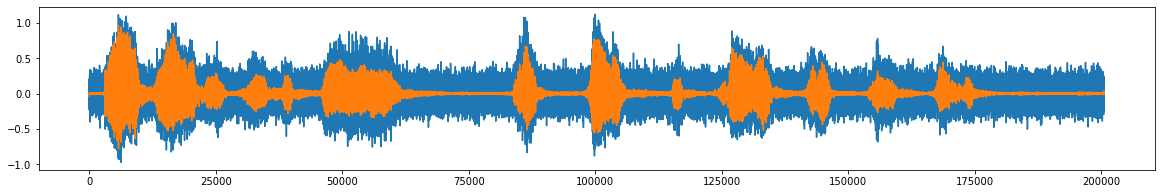

In [24]:
reduce_background_noise(add_noise(read_audio()[1],read_audio()[2])[1],add_noise(read_audio()[1],read_audio()[2])[2])

In [25]:
res=speech_to_text(local_path)
print(res.messages[0].text)

2021-09-26 13:05:21,652 - symbl - 5552 - INFO - Job with jobId 4b37ecda-7bb2-444b-b485-0e35f068732b for conversationId 6623618126577664 started
2021-09-26 13:05:52,030 - symbl - 5552 - INFO - Fetching latest status of job 4b37ecda-7bb2-444b-b485-0e35f068732b, current status is completed


I know the human being and fish can coexist peacefully.


In [36]:
loc=get_location()
geocoder = OpenCageGeocode(key)
location=geocoder.reverse_geocode(loc['lat'], loc['lon'])
print(loc['zip'],loc['lat'],loc['lon'],loc['regionName'],loc['countryCode'])
create_map(loc['lat'],loc['lon'],location)

60616 41.8486 -87.6288 Illinois US


In [50]:
message= "Location : "+str(loc['zip'])+" "+str(loc['lat'])+" "+str(loc['lon'])+" "+str(loc['regionName'])+" "+str(loc['countryCode'])+" | Message : "+res.messages[0].text
message

'Location : 60616 41.8486 -87.6288 Illinois US | Message : I know the human being and fish can coexist peacefully.'

In [51]:
send_message_sms("+13124680844",message)

2021-09-26 13:22:52,212 - telnyx - 5552 - INFO - message='Request to Telnyx api' method=post path=https://api.telnyx.com/v2/messages
2021-09-26 13:22:52,212 - telnyx - 5552 - DEBUG - message='Post details' post_data='{"to": "+13124680844", "text": "Location : 60616 41.8486 -87.6288 Illinois US | Message : I know the human being and fish can coexist peacefully.", "from": "+13124458969"}'
2021-09-26 13:22:53,476 - telnyx - 5552 - INFO - message='Telnyx API response' path=https://api.telnyx.com/v2/messages response_code=200
2021-09-26 13:22:53,477 - telnyx - 5552 - DEBUG - body='{\n  "data": {\n    "record_type": "message",\n    "direction": "outbound",\n    "id": "40317c23-5877-4291-bad2-af2043383519",\n    "type": "SMS",\n    "organization_id": "1094cd57-8fae-4b9b-b556-848c7c51de14",\n    "messaging_profile_id": "40017c20-5e15-4936-9b2d-3a7246e4b11f",\n    "from": {\n      "phone_number": "+13124458969",\n      "carrier": "Telnyx",\n      "line_type": "Wireless"\n    },\n    "to": [\n  

In [64]:
from IPython.display import IFrame
IFrame(src='./Location.html', width=500, height=300)

In [65]:
def call():
    reduce_background_noise(add_noise(read_audio()[1],read_audio()[2])[1],add_noise(read_audio()[1],read_audio()[2])[2])
    res=speech_to_text(local_path)
    print(res.messages[0].text)
    loc=get_location()
    geocoder = OpenCageGeocode(key)
    location=geocoder.reverse_geocode(loc['lat'], loc['lon'])
    print(loc['zip'],loc['lat'],loc['lon'],loc['regionName'],loc['countryCode'])
    create_map(loc['lat'],loc['lon'],location)
    message= "Location : "+str(loc['zip'])+" "+str(loc['lat'])+" "+str(loc['lon'])+" "+str(loc['regionName'])+" "+str(loc['countryCode'])+" | Message : "+res.messages[0].text
    print(message)
    send_message_sms("+13124680844",message)
    return IFrame(src='./Location.html', width=500, height=300)

2021-09-26 13:49:54,568 - symbl - 5552 - INFO - Job with jobId 3575483f-a094-41c7-b2f1-0632695bf7a1 for conversationId 4973665335640064 started
2021-09-26 13:50:24,911 - symbl - 5552 - INFO - Fetching latest status of job 3575483f-a094-41c7-b2f1-0632695bf7a1, current status is completed


I know the human being and fish can coexist peacefully.


2021-09-26 13:50:26,852 - telnyx - 5552 - INFO - message='Request to Telnyx api' method=post path=https://api.telnyx.com/v2/messages
2021-09-26 13:50:26,854 - telnyx - 5552 - DEBUG - message='Post details' post_data='{"to": "+13124680844", "text": "Location : 60616 41.8486 -87.6288 Illinois US | Message : I know the human being and fish can coexist peacefully.", "from": "+13124458969"}'


60616 41.8486 -87.6288 Illinois US
Location : 60616 41.8486 -87.6288 Illinois US | Message : I know the human being and fish can coexist peacefully.


2021-09-26 13:50:27,348 - telnyx - 5552 - INFO - message='Telnyx API response' path=https://api.telnyx.com/v2/messages response_code=200
2021-09-26 13:50:27,349 - telnyx - 5552 - DEBUG - body='{\n  "data": {\n    "record_type": "message",\n    "direction": "outbound",\n    "id": "40317c23-71b6-4757-8829-467cd2413280",\n    "type": "SMS",\n    "organization_id": "1094cd57-8fae-4b9b-b556-848c7c51de14",\n    "messaging_profile_id": "40017c20-5e15-4936-9b2d-3a7246e4b11f",\n    "from": {\n      "phone_number": "+13124458969",\n      "carrier": "Telnyx",\n      "line_type": "Wireless"\n    },\n    "to": [\n      {\n        "phone_number": "+13124680844",\n        "status": "queued",\n        "carrier": "T-MOBILE USA, INC.",\n        "line_type": "Wireless"\n      }\n    ],\n    "cc": [],\n    "text": "Location : 60616 41.8486 -87.6288 Illinois US | Message : I know the human being and fish can coexist peacefully.",\n    "media": [],\n    "webhook_url": "",\n    "webhook_failover_url": "",\n 

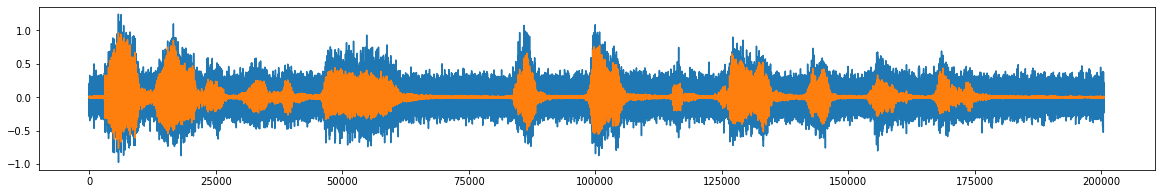

In [69]:
call()